<a href="https://colab.research.google.com/github/Slimteslim/Customers-Loan-Portfolio-Analysis/blob/main/IBT_Exploratory_Data_Analysis_Customer_Loan_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [3]:
credit= pd.read_csv("/content/credit_train(in) - credit_train(in).csv")
credit

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [4]:
# Check the shape and description of the dataset
print("Shape: \n" , credit.shape)

Shape: 
 (100000, 19)


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [6]:
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
credit.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,19154
Annual Income,19154
Years in current job,4222
Home Ownership,0
Purpose,0


In [8]:
credit["Loan Status"].value_counts()

,count
Loan Status,
Fully Paid,77361
Charged Off,22639


In [9]:
credit['Term'].value_counts()

,count
Term,
Short Term,72208
Long Term,27792


<Axes: >

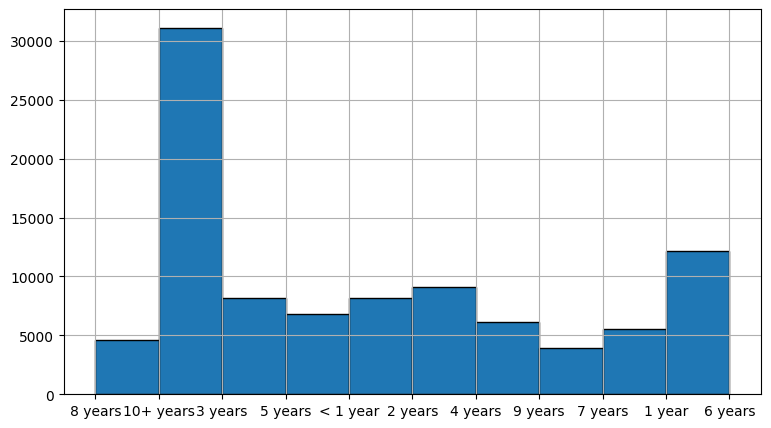

In [10]:
credit['Years in current job'].hist(figsize=(9,5), bins=10, edgecolor="black")

<Axes: >

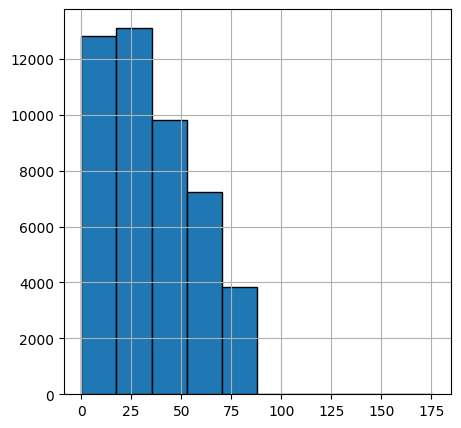

In [11]:
credit['Months since last delinquent'].hist(figsize=(5,5), edgecolor="black")

In [12]:
credit['Bankruptcies'].value_counts(normalize=True)*100
#percentage of people that have once upon a time declared bankruptcies

,proportion
Bankruptcies,
0.0,88.955469
1.0,10.496413
2.0,0.417852
3.0,0.093190
4.0,0.027055
5.0,0.007014
6.0,0.002004
7.0,0.001002


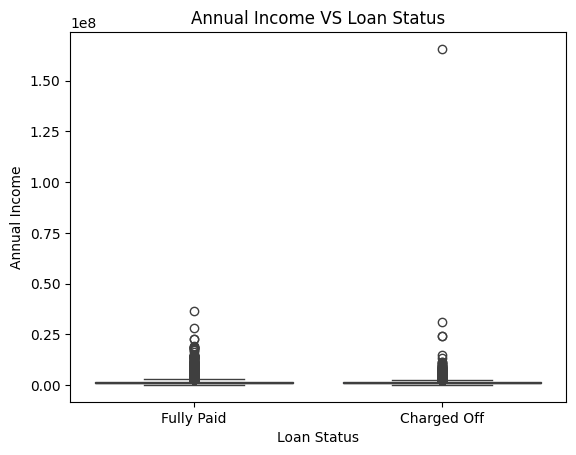

In [13]:
sns.boxplot(y="Annual Income", x="Loan Status", data=credit)
plt.title("Annual Income VS Loan Status")
plt.show()

<Axes: >

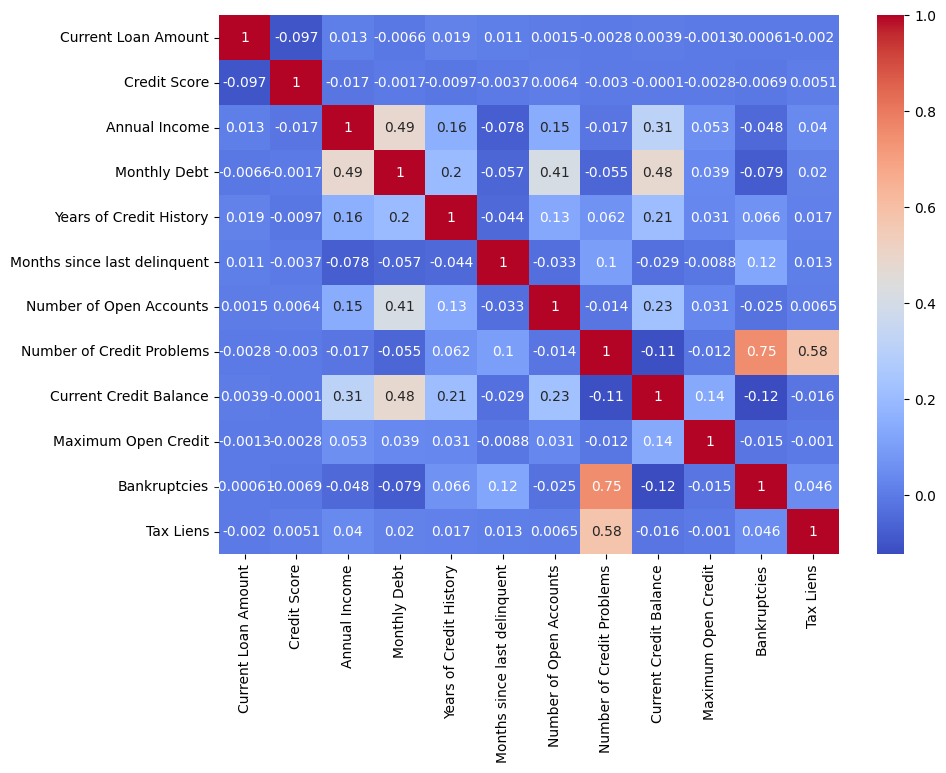

In [14]:
corr = credit.corr(numeric_only=True)
fig, axs = plt.subplots(1,1, figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axs)

In [15]:
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [16]:
credit.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4,1,45600,91014.0,1.0,0.0


Now let's do the full EDA!

In [17]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
New_Credit = pd.read_csv("/content/credit_train(in) - credit_train(in).csv")
New_Credit

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [20]:
New_Credit.shape

(100000, 19)

In [21]:
New_Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [22]:
New_Credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [23]:
print("Missing Values")
print(New_Credit.isnull().sum())

Missing Values
Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64


In [24]:
missing_percent = New_Credit.isnull().mean()*100
print(missing_percent[missing_percent>0].sort_values(ascending=False))

Months since last delinquent    53.141
Annual Income                   19.154
Credit Score                    19.154
Years in current job             4.222
Bankruptcies                     0.204
Tax Liens                        0.010
Maximum Open Credit              0.002
dtype: float64


In [25]:
New_Credit.drop(columns=["Months since last delinquent"], inplace=True)
New_Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  int64  
 4   Term                       100000 non-null  object 
 5   Credit Score               80846 non-null   float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  int64  
 13  Number of Credit Problems  100

In [26]:
New_Credit['Credit Score'].skew()

np.float64(3.8632252703245418)

<Axes: >

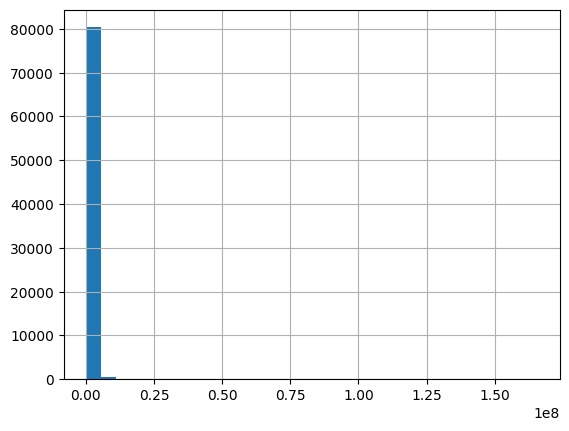

In [27]:
New_Credit['Annual Income'].hist(bins=30)

In [28]:
New_Credit['Credit Score'].fillna(New_Credit['Credit Score'].median(), inplace=True)
New_Credit["Credit Score"].head(5)

/tmp/ipython-input-2143440530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  New_Credit['Credit Score'].fillna(New_Credit['Credit Score'].median(), inplace=True)


,Credit Score
0,709.0
1,724.0
2,741.0
3,721.0
4,724.0


In [29]:
New_Credit['Annual Income'].fillna(New_Credit['Annual Income'].median(), inplace=True)
New_Credit['Annual Income'].head(5)

/tmp/ipython-input-1862435024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  New_Credit['Annual Income'].fillna(New_Credit['Annual Income'].median(), inplace=True)


,Annual Income
0,1167493.0
1,1174162.0
2,2231892.0
3,806949.0
4,1174162.0


In [30]:
New_Credit['Years in current job'].fillna(New_Credit['Years in current job'].mode()[0], inplace=True)
New_Credit['Bankruptcies'].fillna(New_Credit['Bankruptcies'].mode()[0], inplace=True)
New_Credit['Tax Liens'].fillna(New_Credit['Tax Liens'].mode()[0], inplace=True)
New_Credit['Maximum Open Credit'].fillna(New_Credit['Maximum Open Credit'].median(), inplace=True)
New_Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  int64  
 4   Term                       100000 non-null  object 
 5   Credit Score               100000 non-null  float64
 6   Annual Income              100000 non-null  float64
 7   Years in current job       100000 non-null  object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  int64  
 13  Number of Credit Problems  100

/tmp/ipython-input-3815460346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  New_Credit['Years in current job'].fillna(New_Credit['Years in current job'].mode()[0], inplace=True)
/tmp/ipython-input-3815460346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [31]:
New_Credit.dropna(inplace=True)
New_Credit.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,0
Annual Income,0
Years in current job,0
Home Ownership,0
Purpose,0


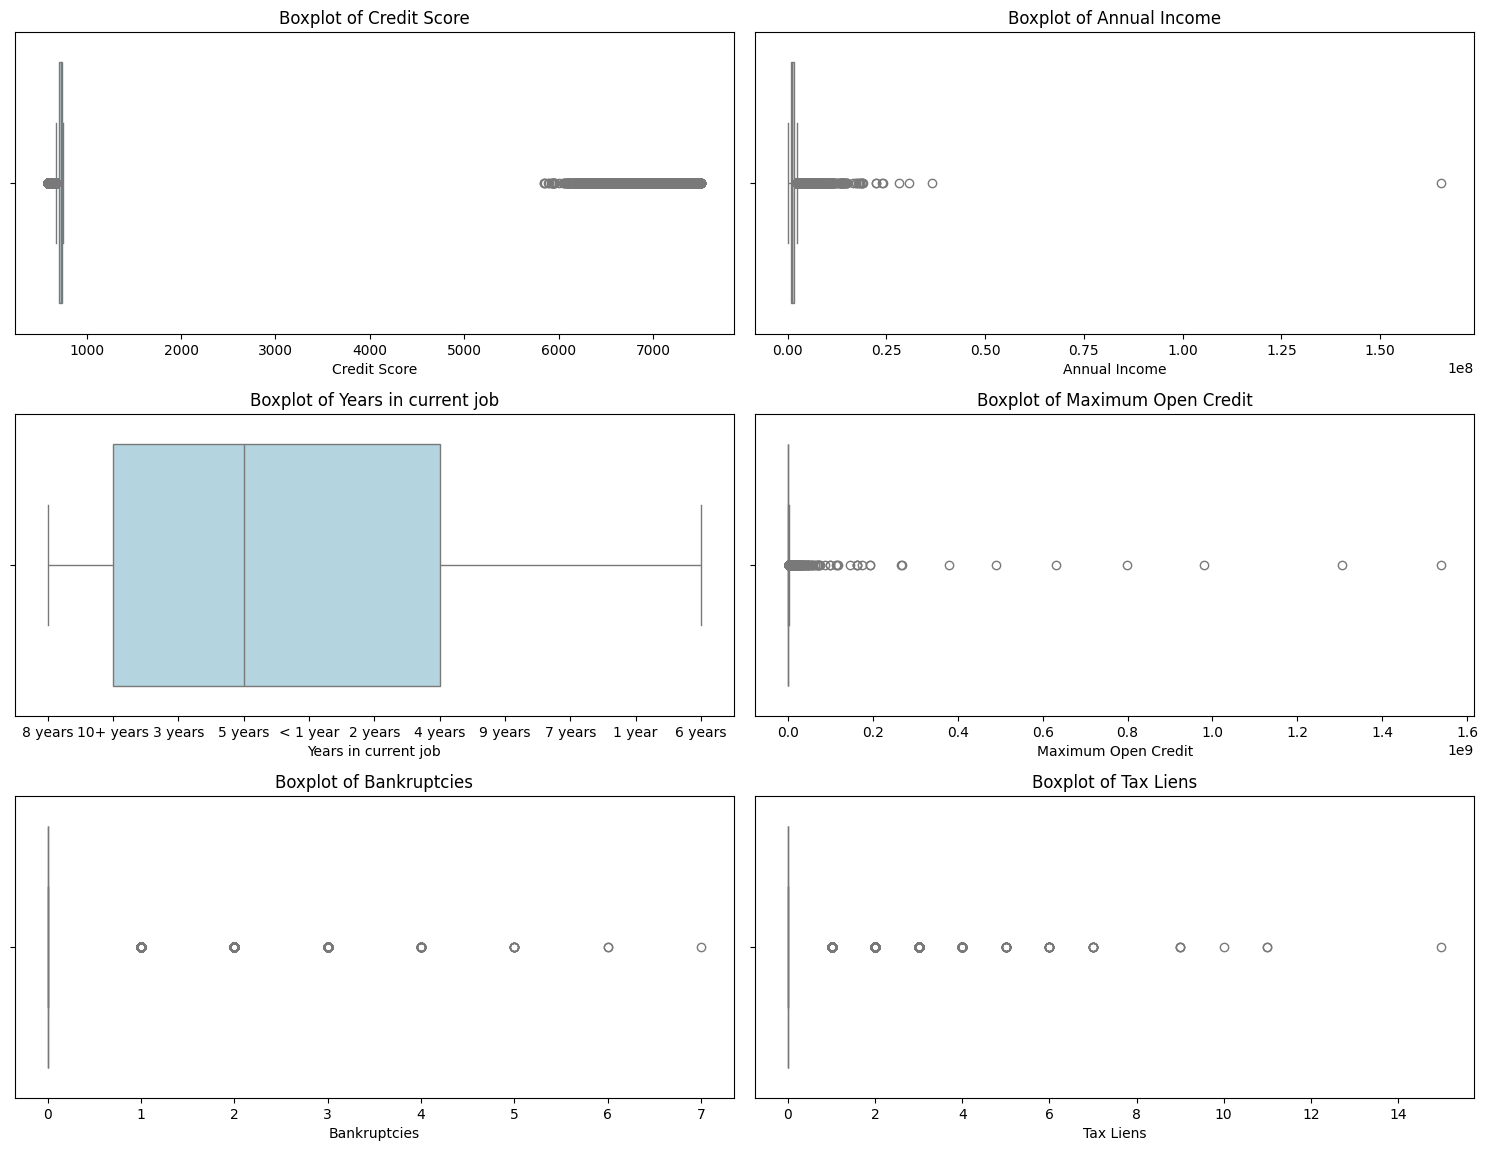

In [32]:
to_check = ['Credit Score', 'Annual Income', 'Years in current job','Maximum Open Credit',
    'Bankruptcies', 'Tax Liens'
  ]
fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(to_check):
   sns.boxplot(data=New_Credit, x=col, ax=axs[i], color='lightblue')
   axs[i].set_title(f"Boxplot of {col}")

# Remove extra subplot if any
for j in range(len(to_check), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [33]:
categorical_cols = ['Term', 'Home Ownership', 'Purpose', 'Loan Status', 'Years in current job']

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(New_Credit[col].value_counts(dropna=False))


Value counts for Term:

Term
Short Term    72208
Long Term     27792
Name: count, dtype: int64

Value counts for Home Ownership:

Home Ownership
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: count, dtype: int64

Value counts for Purpose:

Purpose
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

Value counts for Loan Status:

Loan Status
Fully Paid     77361
Charged Off    22639
Name: count, dtype: int64

Value counts for Years in current job:

Years in current job
10+ years    35343
2

In [34]:
cat_col = ['Loan Status','Term', 'Home Ownership','Purpose','Bankruptcies']
for col in cat_col:
  print(f"\nvalue counts for {col}:\n")
  print(New_Credit[col].value_counts(dropna=False))


value counts for Loan Status:

Loan Status
Fully Paid     77361
Charged Off    22639
Name: count, dtype: int64

value counts for Term:

Term
Short Term    72208
Long Term     27792
Name: count, dtype: int64

value counts for Home Ownership:

Home Ownership
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: count, dtype: int64

value counts for Purpose:

Purpose
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

value counts for Bankruptcies:

Bankruptcies
0.0    88978
1.0    10475
2.0      4

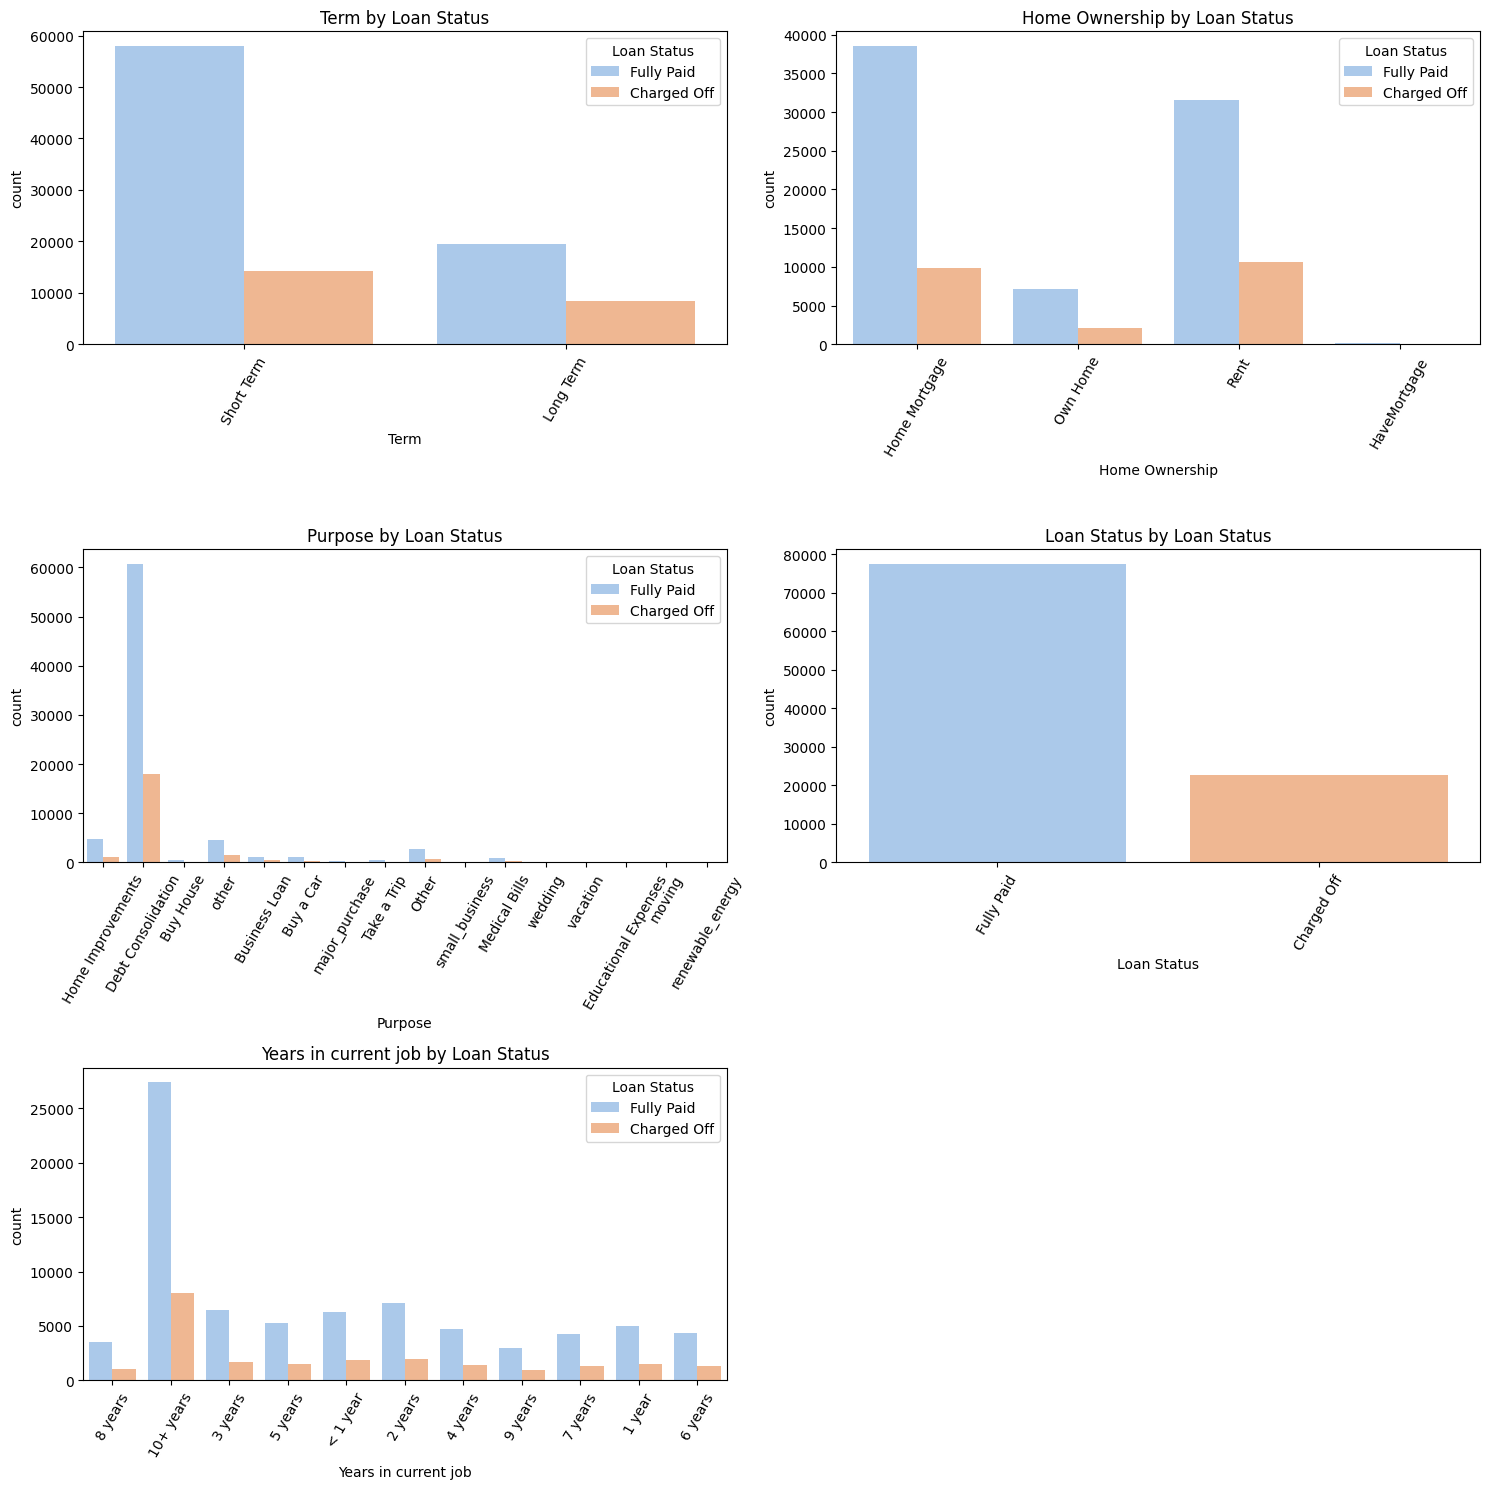

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(categorical_cols[:]):  #[-1] skip 'Years in current job' for now (can be treated both as num/cat)
    sns.countplot(data=New_Credit, x=col, hue='Loan Status', ax=axs[i], palette='pastel')
    axs[i].set_title(f"{col} by Loan Status")
    axs[i].tick_params(axis='x', rotation=60)

# Remove any empty axes
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [36]:
New_Credit.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0


In [37]:
print("\nDuplicate Rows: ", New_Credit.duplicated().sum())


Duplicate Rows:  10215


In [38]:
print("\nData Types: ")
print(New_Credit.dtypes)


Data Types: 
Loan ID                       object
Customer ID                   object
Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object


In [39]:
print("\nSummary:")
print(New_Credit.describe(include="all"))


Summary:
                                     Loan ID  \
count                                 100000   
unique                                 81999   
top     cdf2f31f-f04e-45f9-9ce2-2399235cd6fb   
freq                                       2   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
count                                 100000      100000         1.000000e+05   
unique                                 81999           2                  NaN   
top     56a0ba34-abcd-413a-8c82-0fc0404bec6f  Fully Paid                  NaN   
freq                                       2       77361                  NaN   
mean    